## An example Python data analysis notebook

This page illustrates how to use Python to perform a simple but complete analysis: load data, explore trends in the data by plotting some charts, and run computations based on what we see.

### A tour of capabilities

We're going to start with a look at some of the awesome things that you can do with programming, for motivation for when it gets difficult. However, you will not understand all the detail of the code in this section, and *nor should you*. If you do, maybe one of our more advanced courses is more appropriate for you!

As we show the code for different parts of the work, we will be touching on various aspects you may want to keep in mind, either related to Python specifically, or to research programming more generally.

### Why write software to manage your data and plots? 

We can use programs for our entire research pipeline. Not just big scientific simulation codes, but also the small scripts which we use to tidy up data and produce plots. This should be code, so that the whole research pipeline
is recorded for reproducibility. Data manipulation in spreadsheets is much harder to share or 
check. 

You can see a more advanced demonstration of similar ideas on the [Software Carpentry site](https://swcarpentry.github.io/python-novice-inflammation/). 
We'll try to give links to other sources of Python training along the way.
Part of our approach is that we assume you know how to use the internet! If you
find something confusing out there, please bring it along to the next session. In this course, we'll always try to draw your attention to other sources of information about what we're learning. Paying attention to as many of these as you need to, is just as important as these core notes.

### Importing libraries

Research programming is all about using libraries: tools other people have provided programs that do many cool things.
By combining them we can feel really powerful but doing minimum work ourselves. The Python syntax to import someone else's library is `import`.

In [1]:
import csv # A Python library for reading and writing CSV files
from datetime import datetime # Another library, useful for handling dates
import matplotlib.pyplot as plt # For visualising data, info at: https://matplotlib.org/

If you are following along running it locally, this should work unless you used a different installation method than the recommended. Is that's the case, then you'll need to wait until we've covered [installation of additional Python libraries](./091Libraries.html) in the second part of this course.

### Comments

Code after a `#` symbol doesn't get run. This makes it possible to leave notes for others - and your future self! - about how a particular section of code works.

In [2]:
print("This runs") # print("This doesn't")
# print("This doesn't either")

This runs


### Functions and loops

We can wrap code up in a **function**, so that we can repeatedly get just the information we want. One way that this is useful in the example that follows is for handling data storage. If we look in the `data` directory we can see there are three similarly named files:


In [3]:
!ls data/*.csv

HadCRUT.5.0.1.0.analysis.summary_series.global.monthly.csv
HadCRUT.5.0.1.0.analysis.summary_series.northern_hemisphere.monthly.csv
HadCRUT.5.0.1.0.analysis.summary_series.southern_hemisphere.monthly.csv


If we know we are going to use all three files, and we want to future-proof our code against changes to our data sources, e.g. an update in the data version number `5.0.1.0`, we could use a function so that we only need to make this change in one place rather than one for each file:

In [4]:
def build_filepath(file_id):
    filepath = './data/HadCRUT.5.0.1.0.analysis.summary_series.{}.monthly.csv'.format(file_id)
    return filepath

This enables us to specify the filepath using only its unique part:

In [5]:
build_filepath('global')

'./data/HadCRUT.5.0.1.0.analysis.summary_series.global.monthly.csv'

Defining **functions** which put together code to make a more complex task seem simple from the outside is the most important thing in programming. The output of the function is stated by `return`; the input is specified in brackets after the function name.


 **Loops** are a way of processing items in a series one-by-one, and the syntax in Python for doing this is `for x in y`, where `x` is an arbitrary name that you can use to refer back to each item in the section of code that follows. This function will load a CSV then loop through its rows, extracting the data we need:

In [6]:
def load_data(filepath):
    with open(filepath) as csvfile:
        dates = []
        values = []
        for row in csv.DictReader(csvfile):
            year_month = row['Time']
            date = datetime.strptime(year_month, '%Y-%m')
            dates.append(date)
            values.append(float(row['Anomaly (deg C)']))
    return (dates, values)

Loops are not the most efficient way of processing large datasets, but they are very readable and a great way to get started with programmatic data analysis.

### Variables

We can store data in variables by using the equals sign to assign a value to a name, e.g. `day = 'Friday'`. In this case the first function returns the filepath we need to load the "global" data, and the second function returns both dates and values extracted from the CSV at this location - we can capture both at the same time by separating them with a comma, as follows:

In [7]:
global_filepath = build_filepath('global')
global_dates, global_values = load_data(global_filepath)

Because our `load_data` function returns two lists - a list of dates and a list of values - we can take a look at a small subset of the data by using a technique known as slicing. The following syntax will print only the first five entries in the lists stored in each of the two variable names:

In [8]:
print('Dates:')
print(global_dates[:5])
print('-----')
print('Values:')
print(global_values[:5])
print('-----')

Dates:
[datetime.datetime(1850, 1, 1, 0, 0), datetime.datetime(1850, 2, 1, 0, 0), datetime.datetime(1850, 3, 1, 0, 0), datetime.datetime(1850, 4, 1, 0, 0), datetime.datetime(1850, 5, 1, 0, 0)]
-----
Values:
[-0.67456436, -0.333416, -0.59132266, -0.58872116, -0.5081851]
-----


Python is telling us that the dates variable contains a series of `datetime` objects, starting in January 1850, and the values variable contains a series of decimal numbers, known in Python as `float` (although this is not explicit in the output above).

### Visualising the data

Using the matplotlib library that we loaded earlier and just two lines of code, we can visualise this data, which has been produced and made available for download by [the UK Met Office's Hadley Centre](https://www.metoffice.gov.uk/hadobs/hadcrut5/) and shows monthly global temparature anomalies since 1850:

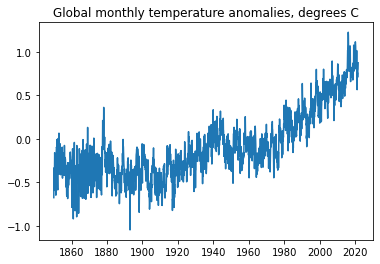

In [9]:
plt.title('Global monthly temperature anomalies, degrees C')
plt.plot(global_dates, global_values);

As you will have spotted in the list of filepaths we saw earlier, the Hadley Centre helpfully breaks down this global data into its two constituent hemispheres. We can load this data, re-using the functions we prepared earlier, with the output of `build_filepath` directly becoming the input of `load_data`:

In [10]:
north_dates, north_values = load_data(build_filepath('northern_hemisphere'))
south_dates, south_values = load_data(build_filepath('southern_hemisphere'))

We can write **automated tests** so that if we run our analysis again later, using updated data, we can check our assumptions that the three data sources all cover the same time period:

In [11]:
assert global_dates == north_dates
assert north_dates == south_dates

We are now ready to plot the northern hemisphere data alongside the southern hemisphere data, adding labels and a legend to identify which line is which:

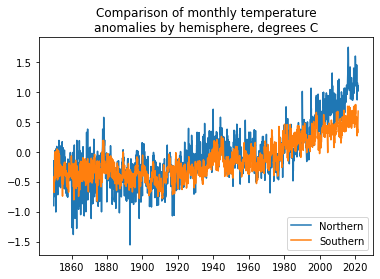

In [12]:
plt.title('Comparison of monthly temperature\nanomalies by hemisphere, degrees C')
plt.plot(global_dates, north_values, label = 'Northern')
plt.plot(global_dates, south_values, label = 'Southern')
plt.legend(loc = 'lower right');

If building similar plots is something we're going to do more than once in our analysis, we may want to turn this too into - you guessed it! - a function. Here we add one more feature to our data-plotting function, which will credit our sources, using matlotlib's `annotate` function.

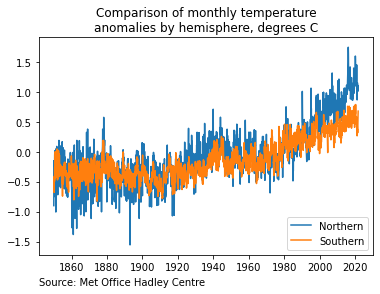

In [26]:
def plot_data(title_text, dates, datasets, labels, source_text):
    plt.title(title_text)
    for values, label in zip(datasets, labels):
        plt.plot(dates, values, label = label)
    plt.annotate(text = source_text,
                 xy = (0, 0),
                 xytext = (0, -22),
                 xycoords = 'axes fraction',
                 textcoords = 'offset points',
                 va = 'top')
    plt.legend(loc = 'lower right')

plot_data(title_text = 'Comparison of monthly temperature\nanomalies by hemisphere, degrees C',
          dates = global_dates,
          datasets = [north_values, south_values],
          labels = ['Northern', 'Southern'],
          source_text = 'Source: Met Office Hadley Centre')

### Filtering

It looks like there has been a significant divergence between the two hemispheres since about the year 2000. If we write a function that can filter the data by date, we can test this hypothesis.

In [14]:
def filter_data(threshold_year, values):
    threshold_date = datetime(year=threshold_year, month=1, day=1)
    filtered_values = []
    for date, value in zip(global_dates, values):
        if date >= threshold_date:
            filtered_values.append(value)
    return filtered_values

north_since_2000 = filter_data(2000, north_values)
south_since_2000 = filter_data(2000, south_values)

Python has some helpful built-in functions to help us understand our data, like this one which can tell us how many observations we have now in our filtered data, aka its `len`gth:

In [15]:
print(len(north_since_2000))
print(len(south_since_2000))

261
261


We may want to plot this data to double-check our filtering function is working as expected. To do this we will need to obtain the corresponding dates to our filtered values, and we can use the list slicing feature to count the requisiste number of values back from the end of the list of dates, by using the `-` sign and putting this value before the `:`. We can then build the plot by re-using our `plot_data` function. Note that if we wish we don't have to name all the inputs to the function, e.g. `title_text = 'Title'`, we can just send them off to the function in the right order.

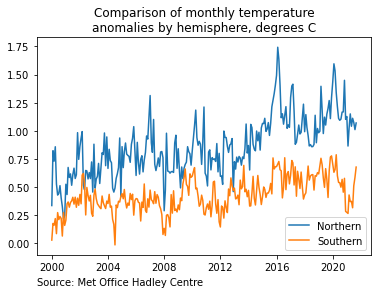

In [27]:
num_data_points = len(north_since_2000)
dates_since_2000 = global_dates[-num_data_points:]
plot_data('Comparison of monthly temperature\nanomalies by hemisphere, degrees C',
          dates_since_2000,
          [north_since_2000, south_since_2000],
          ['Northern', 'Southern'],
          'Source: Met Office Hadley Centre')

Reassuringly, this looks like the data we saw in the previous chart, zoomed in as expected.

### Summary statistics

We can now quantify some measure of the difference between these two sets of data. There are many ways of doing this in Python, but we're just going to look at a simple comparison of the average value here, using a Python library called `statistics`:

In [17]:
import statistics

north_mean = statistics.mean(north_since_2000)
south_mean = statistics.mean(south_since_2000)

We can now report our "findings", using the `format` method to show only the first 3dp in our summary statistics:

In [18]:
print('Northern hemisphere average: {:.3f}'.format(north_mean))
print('Southern hemisphere average: {:.3f}'.format(south_mean))
print('Difference:                  {:.3f}'.format(north_mean - south_mean))

Northern hemisphere average: 0.862
Southern hemisphere average: 0.428
Difference:                  0.434


And that's it! We've covered, very very quickly, the majority of the Python language, and much of the theory of software engineering.

Now we'll go back, carefully, through all the concepts we touched on, and learn how to use them properly ourselves.